In [14]:
import numpy as np
import gymnasium as gym
import random
import time
from IPython.display import clear_output
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
env = gym.make('FrozenLake-v1', render_mode='rgb_array', map_name='4x4', is_slippery=True)

In [28]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [29]:
# initialize 
q_table = np.zeros((env.observation_space.n, env.action_space.n))
rewards_all_episodes = []

## Q-learning algorithm
# iterate over episodes
for episode in tqdm(range(num_episodes)):
    
    # initialize new episode params
    state, _ = env.reset()
    done = False
    rewards = 0

    # iterate over steps in episode
    for step in range(max_steps_per_episode): 

        # Take new action
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            # exploitation
            action = np.argmax(q_table[state,:])
        else:
            # exploration
            action = env.action_space.sample()

        # Take new action
        new_state, reward, done, _, _ = env.step(action)
        
        # Update Q-table
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        # Set new state
        state = new_state

        # Add new reward        
        rewards += reward

        # check if done, and if so end the episode 
        if done == True: 
            break

    # Exploration rate decay   
    exploration_rate = min_exploration_rate + \
                       (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards)

100%|██████████| 50000/50000 [00:29<00:00, 1680.44it/s]


Average reward per thousand episodes



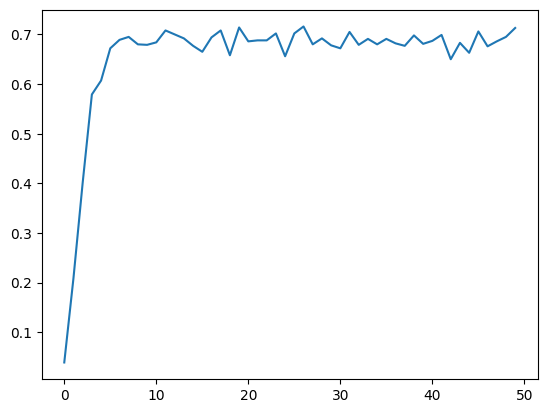

In [34]:
# plot rewards
average_reward = []
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("Average reward per thousand episodes\n")
for r in rewards_per_thousand_episodes:
    average_reward.append(sum(r/1000))
    # print(count, ": ", str(sum(r/1000)))
    count += 1000

plt.plot(average_reward)

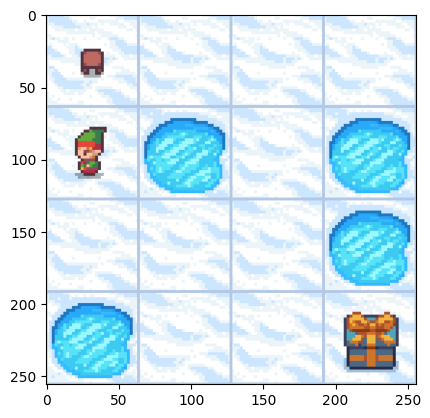

KeyboardInterrupt: 

In [35]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table

for episode in range(3):
    # initialize new episode params
    state, _ = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):        
        # Show current state of environment on screen
        clear_output(wait=True)
        # display gymnaisum environment
        plt.imshow(env.render())
        plt.show()
        # print(env.render())
        time.sleep(0.3)

        # Choose action with highest Q-value for current state       
        action = np.argmax(q_table[state,:])

        # Take new action
        new_state, reward, done, _, _ = env.step(action)

        if done:
            if reward == 1:
                # Agent reached the goal and won episode
                time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode            
                time.sleep(3)
                clear_output(wait=True)
            break

        # Set new state
        state = new_state

env.close()